## Import Library and Load Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


data = pd.read_csv('/content/assignment_employee_survey.csv')
data

,emp_id,gender,age,marital_status,job_level,experience,dept,emp_type,wlb,work_env,...,sleep_hours,commute_mode,commute_distance,num_companies,team_size,num_reports,edu_level,have_ot,training_hours_per_year,job_satisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,45,Female,33,Married,Mid,10,Operations,Part-Time,2,3,...,6.2,Car,8,3,13,0,Bachelor,False,35.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761,2070,Male,47,Married,Lead,16,Marketing,Part-Time,1,3,...,6.8,Public Transport,15,8,28,8,Master,False,58.0,1
2762,2072,Female,47,Married,Lead,8,IT,Contract,3,1,...,6.9,Car,28,8,21,8,Master,True,54.0,1
2763,2145,Male,41,Married,Lead,17,IT,Full-Time,1,1,...,6.1,Public Transport,9,6,23,3,Master,True,58.5,1
2764,2168,Female,54,Married,Lead,16,IT,Full-Time,1,5,...,7.7,Public Transport,18,10,30,7,Master,True,58.0,1


## Data Understanding

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   emp_id                   2766 non-null   int64  
 1   gender                   2766 non-null   object 
 2   age                      2766 non-null   int64  
 3   marital_status           2766 non-null   object 
 4   job_level                2766 non-null   object 
 5   experience               2766 non-null   int64  
 6   dept                     2766 non-null   object 
 7   emp_type                 2766 non-null   object 
 8   wlb                      2766 non-null   int64  
 9   work_env                 2766 non-null   int64  
 10  physical_activity_hours  2766 non-null   float64
 11  workload                 2766 non-null   int64  
 12  stress                   2766 non-null   int64  
 13  sleep_hours              2766 non-null   float64
 14  commute_mode            

In [4]:
data.isnull().sum()

,0
emp_id,0
gender,0
age,0
marital_status,0
job_level,0
experience,0
dept,0
emp_type,0
wlb,0
work_env,0


In [5]:
data.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis (EDA)

In [6]:
data.value_counts('emp_type', normalize =True)

,proportion
emp_type,
Full-Time,0.685828
Part-Time,0.209328
Contract,0.104845


Tingkat kepuasan karyawan berdasarkan job level

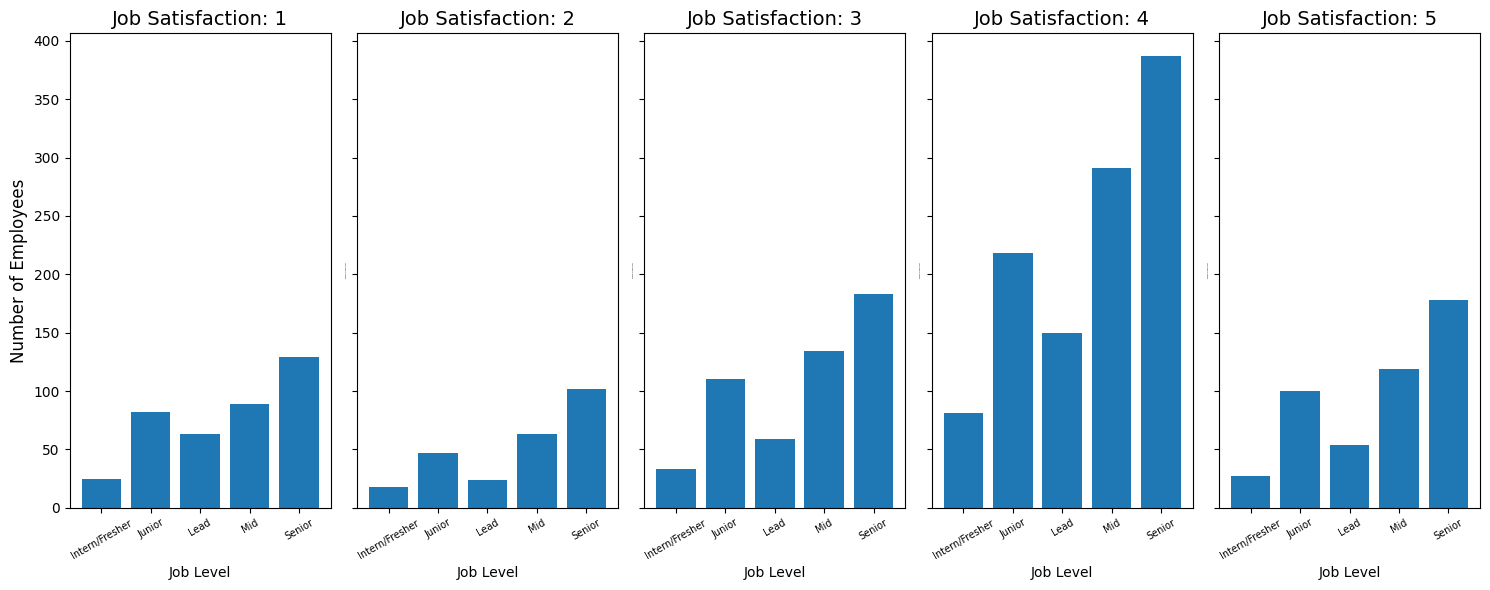

In [9]:
import matplotlib.pyplot as plt

# Menghitung jumlah karyawan berdasarkan job_satisfaction dan job_level
p_1 = data.groupby(['job_satisfaction', 'job_level']).agg({'emp_id': 'count'}).reset_index()

# Unik kategori job_satisfaction (1 sampai 5)
p_categories = p_1['job_satisfaction'].unique()

# Visualisasi
fig, axes = plt.subplots(1, len(p_categories), figsize=(15, 6), sharey=True)

# Menampilkan grafik untuk setiap kategori job_satisfaction
for i, category in enumerate(p_categories):

    # Filter data untuk kategori job_satisfaction tertentu
    p_viz = p_1[p_1['job_satisfaction'] == category]

    # Membuat grafik batang
    axes[i].bar(p_viz['job_level'], p_viz['emp_id'])

    axes[i].set_title(f'Job Satisfaction: {category}', fontsize=14)
    axes[i].set_xlabel('Job Level', fontsize=10)
    axes[i].set_ylabel('Number of Employees', fontsize=12 if i == 0 else 0)  # Hanya satu label sumbu Y
    axes[i].tick_params(axis='x', labelrotation=30, labelsize=7)

# Menyesuaikan layout agar lebih rapih
plt.tight_layout()
plt.show()


Tingkat kepuasan karyawan bersarkan beban kerja

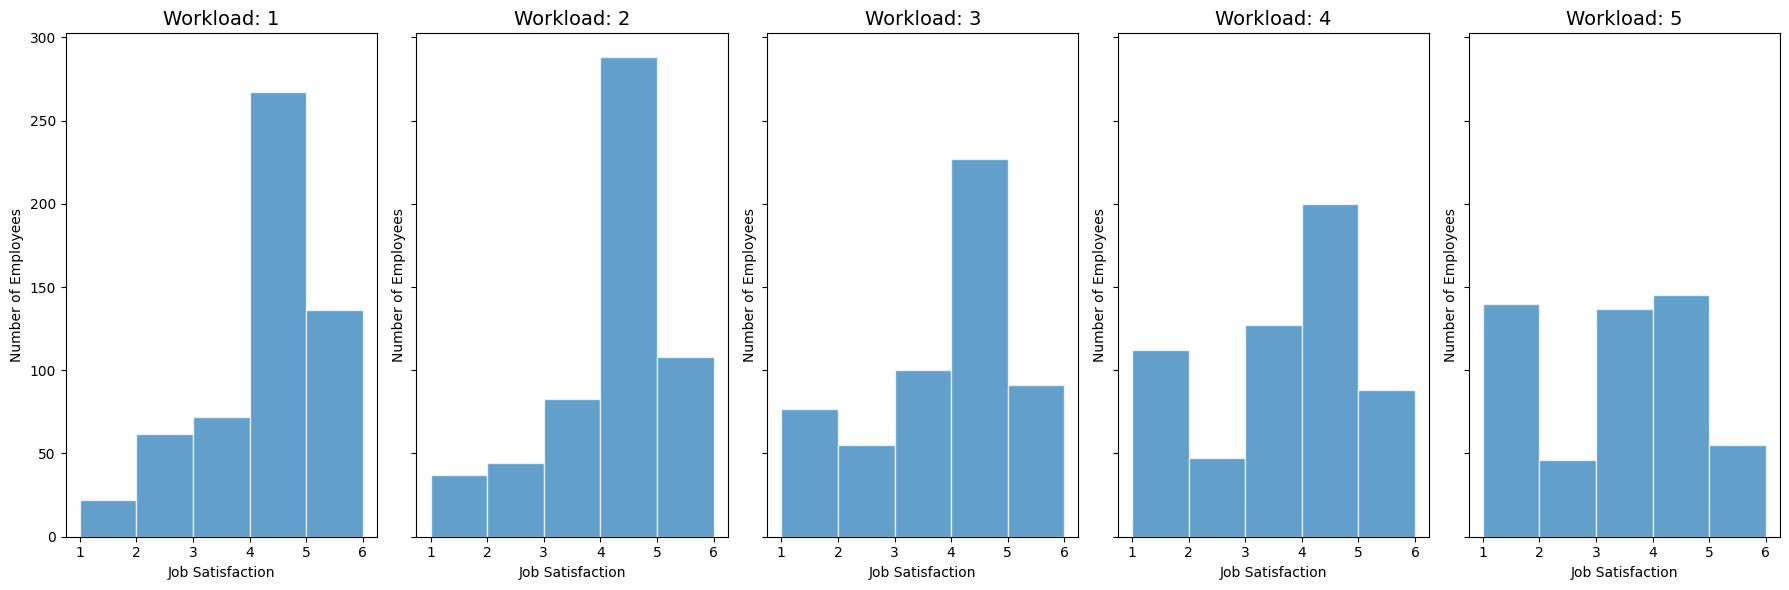

In [11]:
import matplotlib.pyplot as plt



# Tentukan interval bins berdasarkan 'workload' dan 'job_satisfaction'
bins = range(1, 7, 1)  # Interval 1-5 untuk beban kerja dan kepuasan kerja

# Buat figure dan axes untuk subplots
fig, axes = plt.subplots(1, 5, figsize=(18, 6), sharey=True)

# Plot histogram untuk setiap kategori 'workload' (1-5)
for i, workload_level in enumerate(range(1, 6)):
    # Filter data berdasarkan workload
    subset = data[data['workload'] == workload_level]

    # Buat histogram untuk 'job_satisfaction' berdasarkan kategori 'workload'
    axes[i].hist(subset['job_satisfaction'], bins=bins, edgecolor='white', alpha=0.7)

    # Set judul, label x dan y untuk setiap subplot
    axes[i].set_title(f'Workload: {workload_level}', fontsize=14)
    axes[i].set_xlabel('Job Satisfaction', fontsize=10)
    axes[i].set_ylabel('Number of Employees', fontsize=10)

# Tampilkan plot
plt.tight_layout()
plt.show()


Tingkat kepuasan karyawan berdasarkan beban kerja dan umur

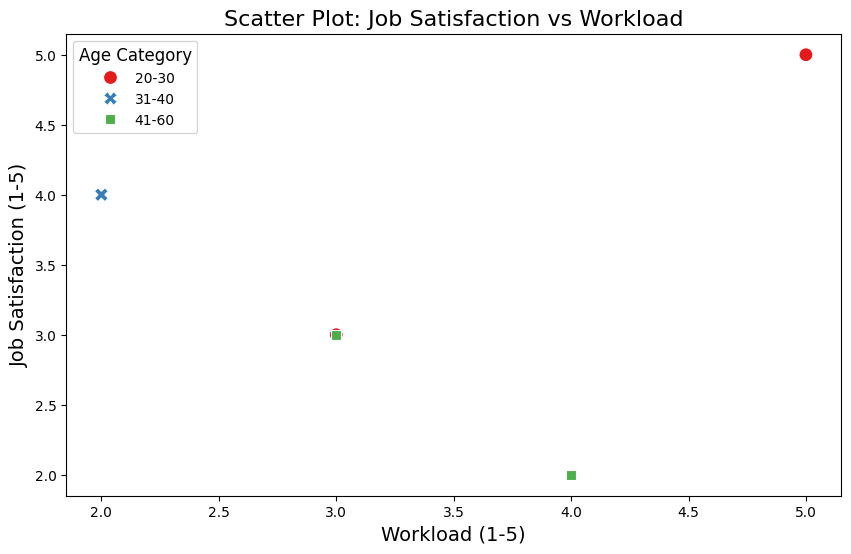

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'age': [25, 35, 45, 28, 50],
    'job_satisfaction': [3, 4, 2, 5, 3],
    'workload': [3, 2, 4, 5, 3]
}

df = pd.DataFrame(data)

# Kategorikan umur
bins = [20, 30, 40, 60]
labels = ['20-30', '31-40', '41-60']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='workload', y='job_satisfaction', hue='age_category', style='age_category', palette='Set1', s=100)

# Menambahkan judul dan label
plt.title('Scatter Plot: Job Satisfaction vs Workload', fontsize=16)
plt.xlabel('Workload (1-5)', fontsize=14)
plt.ylabel('Job Satisfaction (1-5)', fontsize=14)
plt.legend(title='Age Category', title_fontsize=12, fontsize=10)

# Tampilkan plot
plt.show()


Kepuasan karywan berdarkan jam aktivitas fisik dan job levelnya

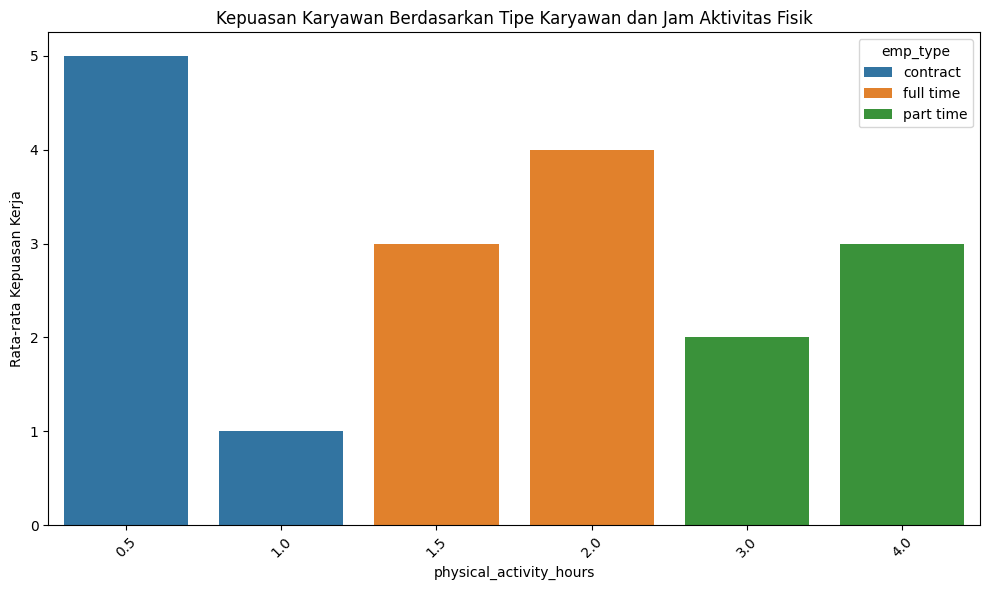

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Mengelompokkan data berdasarkan 'emp_type' dan 'physical_activity_hours', lalu menghitung rata-rata job_satisfaction
grouped_data = df.groupby(['emp_type', 'physical_activity_hours'])['job_satisfaction'].mean().reset_index()

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='physical_activity_hours', y='job_satisfaction', hue='emp_type', data=grouped_data)

# Menambahkan label dan judul
plt.title('Kepuasan Karyawan Berdasarkan Tipe Karyawan dan Jam Aktivitas Fisik')
plt.ylabel('Rata-rata Kepuasan Kerja')
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan plot
plt.show()


Kepuasan karywan berdasarkan tingkat stress, dengan mengkategorikannya
1-2 =Rendah,
3=Sedang
4-5=Tinggi

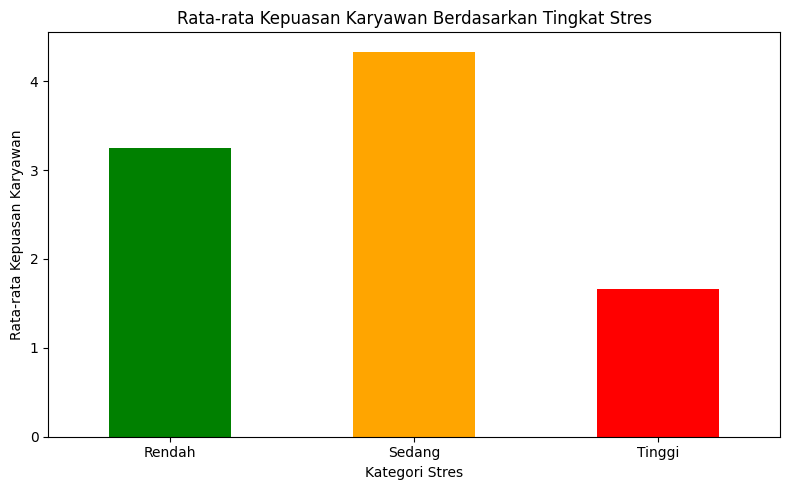

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# Contoh data (silakan sesuaikan dengan data yang ada)
data = {
    'stress': [1, 3, 4, 2, 5, 3, 1, 4, 2, 3],
    'job_satisfaction': [3, 4, 2, 3, 1, 5, 4, 2, 3, 4]
}
df = pd.DataFrame(data)

# Kategorikan tingkat stres
def categorize_stress(stress):
    if stress <= 2:
        return 'Rendah'
    elif stress == 3:
        return 'Sedang'
    else:
        return 'Tinggi'

df['stress_category'] = df['stress'].apply(categorize_stress)

# Menghitung rata-rata kepuasan pekerjaan untuk masing-masing kategori stres
average_satisfaction = df.groupby('stress_category')['job_satisfaction'].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
average_satisfaction.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Rata-rata Kepuasan Karyawan Berdasarkan Tingkat Stres')
plt.xlabel('Kategori Stres')
plt.ylabel('Rata-rata Kepuasan Karyawan')
plt.xticks(rotation=0)
plt.tight_layout()

# Menampilkan grafik
plt.show()
